In [22]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.model_selection import cross_val_score

In [69]:
df_disk=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_Linux_dataset/Train_Test_Linux_disk.csv')
df_mem=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_Linux_dataset/Train_Test_Linux_memory.csv')
df_proc=pd.read_csv('/content/drive/MyDrive/24Jan_DL/ToN-IoT/Train_Test_datasets/Train_Test_Linux_dataset/train_Test_Linux_process.csv')

In [24]:
df_disk

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,1556129666,2167,108.0,0.0,0.0,0,gvfs-afc-volum,1,dos
1,1556129791,2044,0.0,0.0,0.0,0,at-spi2-regist,1,dos
2,1556129831,2234,0.0,0.0,0.0,0,gsd-smartcard,1,dos
3,1556129861,2257,0.0,0.0,0.0,0,gsd-sound,1,dos
4,1556129871,2259,0.0,0.0,0.0,0,gsd-a11y-setti,1,dos
...,...,...,...,...,...,...,...,...,...
160107,1556408978,7625,0.0,0.0,0.0,0,vsftpd,0,normal
160108,1556408983,1488,0.0,0.0,0.0,0,Xorg,0,normal
160109,1556408988,2618,0.0,0.0,0.0,0,unity-panel-se,0,normal
160110,1556408993,3752,0.0,0.0,0.0,0,gnome-terminal,0,normal


In [25]:
df_disk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160112 entries, 0 to 160111
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts      160112 non-null  int64  
 1   PID     160112 non-null  int64  
 2   RDDSK   160112 non-null  float64
 3   WRDSK   160112 non-null  float64
 4   WCANCL  160112 non-null  float64
 5   DSK     160112 non-null  int64  
 6   CMD     160112 non-null  object 
 7   label   160112 non-null  int64  
 8   type    160112 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 11.0+ MB


In [26]:
All_disk=df_disk
labels=list(All_disk.type.value_counts().index)
All_disk['type']=LabelEncoder().fit_transform(All_disk['type'])
num=list(All_disk.type.value_counts().index)
#All_disk['type']=LabelEncoder().fit_transform(All_disk['type'])

In [29]:
df_disk['CMD']=LabelEncoder().fit_transform(df_disk['CMD'])

In [9]:
#All_disk=df_disk
#All_disk['type']=LabelEncoder().fit_transform(All_disk['type'])

In [30]:
X=All_disk.iloc[:,:-1]
y=All_disk.iloc[:,-1]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

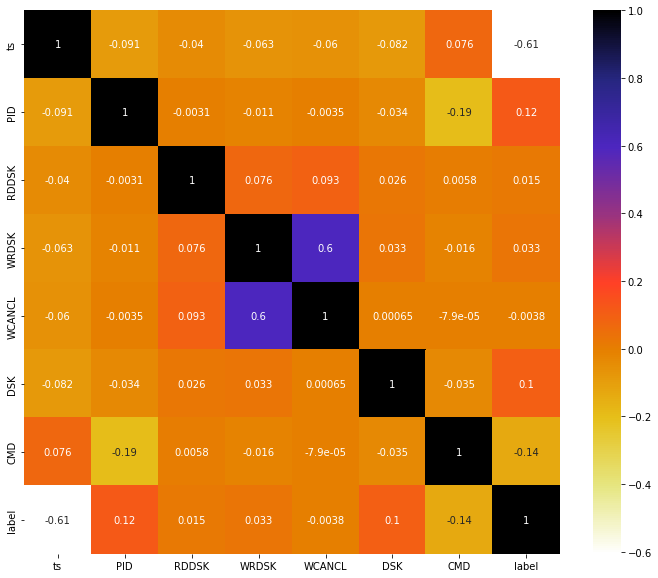

In [32]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
#rc = RidgeClassifier(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,normalize=False, random_state=2, solver='saga')
rc=RidgeClassifier()

In [34]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


[0.81864314 0.82012647 0.8169256  0.81965805 0.81746496]


0.8185636463811747

In [35]:
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      2068
           1       0.96      0.21      0.35      1944
           2       0.40      0.94      0.56      1982
           3       0.00      0.00      0.00        22
           4       1.00      1.00      1.00     19983
           5       0.60      0.39      0.47      2038
           6       0.72      0.03      0.06      2002
           7       0.52      0.55      0.54      1984

    accuracy                           0.82     32023
   macro avg       0.60      0.52      0.47     32023
weighted avg       0.86      0.82      0.80     32023

0.8207850607375948


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8620415178905195, 0.8207850607375948, 0.7954486527857946, None)

In [37]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [38]:
val=dict(zip(num,labels))

In [39]:
maping=set(y_train)
lebl=[val[i] for i in maping]

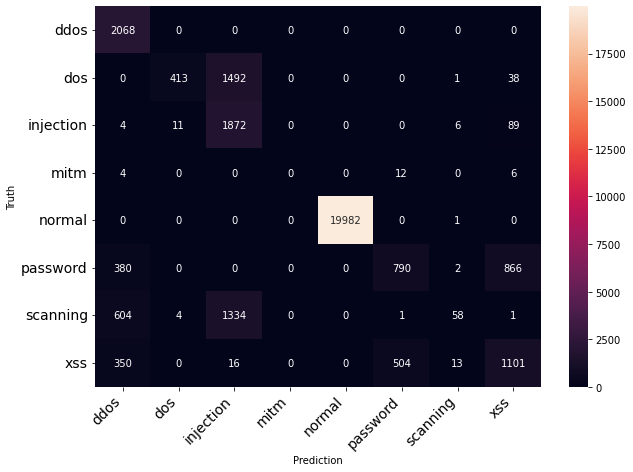

In [40]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [41]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8207850607375948
specificity_score:
0.9880135362465631


# Memory Dataset

In [46]:
df_mem

,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label,type
0,1556129658,1494,0,0.0,2219.0,390.0,82020.0,0.0,0.0,0.02,Xorg,1,dos
1,1556129738,1641,0,0.0,12.0,9480.0,3496.0,0.0,0.0,0.00,haveged,1,dos
2,1556129778,6604,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,kworker/0:1,1,dos
3,1556129788,51017,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,<kworker/u256>,1,dos
4,1556129798,2766,0,0.0,10.0,1.3,68724.0,0.0,0.0,0.02,compiz,1,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140107,1554256770,4373,2076,0.0,148.0,17648.0,2408.0,0.0,0.0,0.00,atop,0,normal
140108,1554256775,1851,0,0.0,36.0,159.8,2000.0,0.0,0.0,0.00,vmtoolsd,0,normal
140109,1554256780,1371,5,0.0,36.0,19296.0,640.0,0.0,0.0,0.00,irqbalance,0,normal
140110,1554256785,1668,0,0.0,12.0,9480.0,292.0,0.0,0.0,0.00,haveged,0,normal


In [47]:
df_mem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140112 entries, 0 to 140111
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts      140112 non-null  int64  
 1   PID     140112 non-null  int64  
 2   MINFLT  140112 non-null  int64  
 3   MAJFLT  140112 non-null  float64
 4   VSTEXT  140112 non-null  float64
 5   VSIZE   140112 non-null  float64
 6   RSIZE   140112 non-null  float64
 7   VGROW   140112 non-null  float64
 8   RGROW   140112 non-null  float64
 9   MEM     140112 non-null  float64
 10  CMD     140112 non-null  object 
 11  label   140112 non-null  int64  
 12  type    140112 non-null  object 
dtypes: float64(7), int64(4), object(2)
memory usage: 13.9+ MB


In [48]:
All_mem=df_mem
labels=list(All_mem.type.value_counts().index)
All_mem['type']=LabelEncoder().fit_transform(All_mem['type'])
num=list(All_mem.type.value_counts().index)
#All_mem['type']=LabelEncoder().fit_transform(All_mem['type'])

In [49]:
All_mem['CMD']=LabelEncoder().fit_transform(All_mem['CMD'])

In [ ]:
#All_mem=df_disk
#All_mem['type']=LabelEncoder().fit_transform(All_mem['type'])

In [50]:
X=All_mem.iloc[:,:-1]
y=All_mem.iloc[:,-1]

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

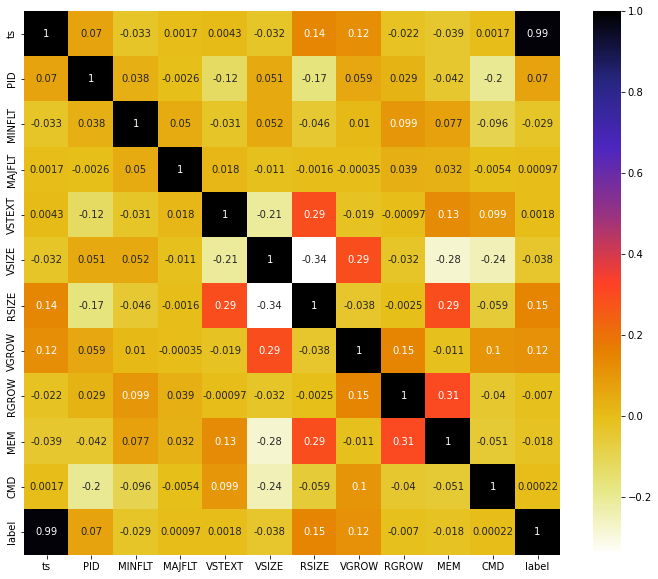

In [52]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [53]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


[0.84534749 0.84316175 0.85542867 0.84954055 0.84779408]


0.8482545079318837

In [54]:
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.39      0.41      0.40      2091
           1       0.35      0.53      0.42      1996
           2       0.43      0.36      0.39      1998
           3       0.50      0.05      0.09        21
           4       1.00      1.00      1.00     19926
           5       0.90      0.51      0.65      1991

    accuracy                           0.84     28023
   macro avg       0.59      0.48      0.49     28023
weighted avg       0.86      0.84      0.85     28023

0.8417371444884559


In [55]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

(0.8596368787544587, 0.8417371444884559, 0.8451388663937552, None)

In [56]:
val=dict(zip(num,labels))

In [57]:
maping=set(y_train)
lebl=[val[i] for i in maping]

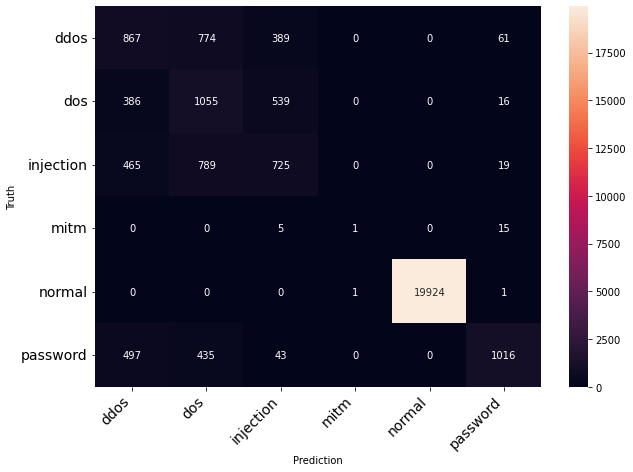

In [58]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [59]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8417371444884559
specificity_score:
0.9876738032845829


# Process Dataset

In [70]:
df_proc

,ts,PID,TRUN,TSLPI,TSLPU,POLI,NICE,PRI,RTPR,CPUNR,Status,EXC,State,CPU,CMD,label,type
0,1556129658,52888,0,1,0,norm,20,100,0,0,0,0,S,0.01,atop,1,dos
1,1556129738,2791,0,5,0,norm,0,120,0,0,0,0,S,0.00,nautilus,1,dos
2,1556129778,2504,0,1,0,norm,0,120,0,2,0,0,S,0.00,upstart-dbus-b,1,dos
3,1556129788,3147,1,12,0,norm,0,120,0,1,0,0,S,1.00,drone,1,dos
4,1556129798,52888,0,1,0,norm,20,100,0,0,0,0,S,0.01,atop,1,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160107,1554250850,2517,0,2,0,norm,0,120,0,0,-,0,S,0.00,gvfsd,0,normal
160108,1554250855,2751,0,3,0,norm,0,120,0,1,-,0,S,0.00,dconf-service,0,normal
160109,1554250860,2583,0,4,0,norm,0,120,0,2,-,0,S,0.00,ibus-dconf,0,normal
160110,1554250865,2489,0,2,0,norm,0,120,0,3,-,0,S,0.00,at-spi2-regist,0,normal


In [71]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160112 entries, 0 to 160111
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts      160112 non-null  int64  
 1   PID     160112 non-null  int64  
 2   TRUN    160112 non-null  int64  
 3   TSLPI   160112 non-null  int64  
 4   TSLPU   160112 non-null  int64  
 5   POLI    160112 non-null  object 
 6   NICE    160112 non-null  int64  
 7   PRI     160112 non-null  int64  
 8   RTPR    160112 non-null  int64  
 9   CPUNR   160112 non-null  int64  
 10  Status  160112 non-null  object 
 11  EXC     160112 non-null  int64  
 12  State   160112 non-null  object 
 13  CPU     160112 non-null  float64
 14  CMD     160112 non-null  object 
 15  label   160112 non-null  int64  
 16  type    160112 non-null  object 
dtypes: float64(1), int64(11), object(5)
memory usage: 20.8+ MB


In [72]:
df_proc.Status

0         0
1         0
2         0
3         0
4         0
         ..
160107    -
160108    -
160109    -
160110    -
160111    -
Name: Status, Length: 160112, dtype: object

In [73]:
All_proc=df_proc
labels=list(All_proc.type.value_counts().index)
All_proc['type']=LabelEncoder().fit_transform(All_proc['type'])
num=list(All_proc.type.value_counts().index)
#All_mem['type']=LabelEncoder().fit_transform(All_mem['type'])

In [74]:
All_proc['POLI']=LabelEncoder().fit_transform(All_proc['POLI'])

In [75]:
All_proc['Status']=LabelEncoder().fit_transform(All_proc['Status'])

In [76]:
All_proc['CMD']=LabelEncoder().fit_transform(All_proc['CMD'])

In [82]:
All_proc['State']=LabelEncoder().fit_transform(All_proc['State'])

In [83]:
All_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160112 entries, 0 to 160111
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ts      160112 non-null  int64  
 1   PID     160112 non-null  int64  
 2   TRUN    160112 non-null  int64  
 3   TSLPI   160112 non-null  int64  
 4   TSLPU   160112 non-null  int64  
 5   POLI    160112 non-null  int64  
 6   NICE    160112 non-null  int64  
 7   PRI     160112 non-null  int64  
 8   RTPR    160112 non-null  int64  
 9   CPUNR   160112 non-null  int64  
 10  Status  160112 non-null  int64  
 11  EXC     160112 non-null  int64  
 12  State   160112 non-null  int64  
 13  CPU     160112 non-null  float64
 14  CMD     160112 non-null  int64  
 15  label   160112 non-null  int64  
 16  type    160112 non-null  int64  
dtypes: float64(1), int64(16)
memory usage: 20.8 MB


In [ ]:
#All_mem=df_disk
#All_mem['type']=LabelEncoder().fit_transform(All_mem['type'])

In [84]:
X=All_proc.iloc[:,:-1]
y=All_proc.iloc[:,-1]

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

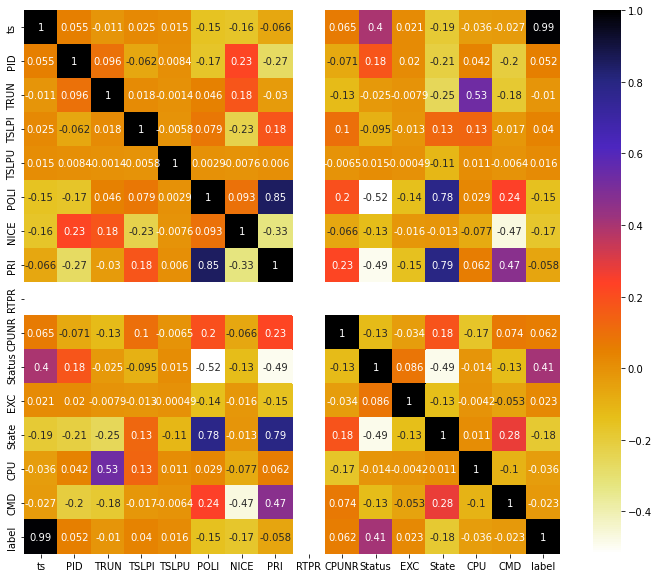

In [86]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [87]:
cv=cross_val_score(rc,X_train,y_train,cv=5)
print(cv)
np.mean(cv)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.25495e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.25437e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.25478e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.2546e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


[0.83667734 0.84065891 0.84393786 0.84073698 0.83862279]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.25387e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.8401267751017999

In [88]:
rc_fit = rc.fit(X_train, y_train)
y_pred_rc = rc_fit.predict(X_test)
rc_accuracy = accuracy_score(y_test, y_pred_rc)
print(classification_report(y_test,y_pred_rc))
print(rc_accuracy)

              precision    recall  f1-score   support

           0       0.49      0.48      0.48      2048
           1       0.37      0.54      0.44      1929
           2       0.49      0.33      0.39      2002
           3       0.00      0.00      0.00        28
           4       1.00      1.00      1.00     19996
           5       0.91      0.32      0.48      2036
           6       0.75      0.95      0.84      2001
           7       0.63      0.83      0.72      1983

    accuracy                           0.84     32023
   macro avg       0.58      0.56      0.54     32023
weighted avg       0.85      0.84      0.83     32023

0.8392093183024701


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.00361e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

In [89]:
# Precision Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_rc,average='weighted')

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8519930876457986, 0.8392093183024701, 0.8332609098881946, None)

In [90]:
val=dict(zip(num,labels))

In [91]:
maping=set(y_train)
lebl=[val[i] for i in maping]

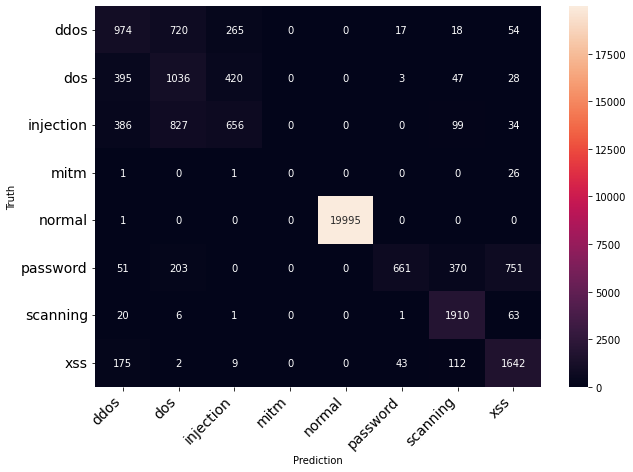

In [92]:
cm=confusion_matrix(y_test, y_pred_rc)
print_confusion_matrix(cm,lebl)

In [93]:
from imblearn.metrics import specificity_score,sensitivity_score
senc=sensitivity_score(y_test, y_pred_rc,average='weighted')
print('sensitivity_score is:')
print(senc)
sepe=specificity_score(y_test, y_pred_rc,average='weighted')
print('specificity_score:')
print(sepe)

sensitivity_score is:
0.8392093183024701
specificity_score:
0.989385296646815
